## Model Training: Predicting Life Expectancy



### Introduction
Having completed the data science analysis, this section focuses on building a regression model to accurately estimate life expectancy across different populations using the available dataset.

### Methodology

To build an effective regression model for predicting life expectancy,  we will follow the steps outlined below:

1. **Import Libraries and Load Data:**  
     import Python libraries and load the life expectancy dataset.

2. **Data Preprocessing:**  
     prepare data for modeling

3. **Feature Selection and Engineering:**  
   Select and engineer relevant features to improve model performance.

4. **Data Splitting:**  
   Split the dataset into training and testing sets to evaluate model performance on unseen data.

5. **Feature Scaling:**  
   Normalize or standardize features.

6. **Model Training:**  
   Train  regression models (Linear Regression, Ridge, Lasso, Random Forest, XGBoost).

7. **Model Evaluation:**  
   Assess model performance using suitable metrics (RMSE, R²).

8. **Cross-Validation:**  
   Perform cross-validation to ensure the robustness and generalizability of the models.

9. **Feature Impact Analysis:**  
   Evaluate how newly engineered features influence model performance.

10. **Model Saving and Deployment:**  
    Save the best performing model for future predictions.




#### Task 1  Imports and Data Loading

In [30]:
# Import essential libraries
import pandas as pd
import numpy as np

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the life expectancy dataset
df = pd.read_csv('Life_Expectancy_Data.csv')

# Display the first few rows to inspect the data
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Task 2 Preprocessing 

In [31]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()


# Drop 'Country' for simplicity (can be one-hot encoded if needed)
df = df.drop(columns=['Country'])

# Encode 'Status' (Developed/Developing) to numeric
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})



#### Task 3  Feature Selection and Engineering


In [ ]:
# List all columns
#print("Available columns:")
#print(df.columns.tolist())

# Select features to use for prediction (excluding the target 'Life expectancy')

features = [
    'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
    'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
    'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources',
    'Schooling'
]

target = 'Life expectancy'

X = df[features]
y = df[target]

# Display the shape of feature matrix and target vector
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (1649, 18)
Target shape: (1649,)


#### Explanation
The feature matrix X contains all the features selected to estimate life expectancy. It has a shape of (1649, 18), meaning it includes 1,649 observations (rows) and 18 features (columns).

The target vector y represents the life expectancy values we aim to predict. It has a shape of (1649,), indicating that there is one target value for each of the 1,649 observations.

This confirms that each row of input features corresponds to one target value, ensuring the dataset is properly aligned for regression model training.

#### Task 4 Data Splitting

We split the dataset into training and test sets. The training set is used to train the model, while the test set is used to evaluate its performance on unseen data.

In [33]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the number of samples in each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 1319
Test set size: 330


#### Explanation
To evaluate the model’s ability to generalize to new, unseen data, the dataset was split into two parts:

Training set (80%): Used to train the machine learning model.

Test set (20%): Used to evaluate the model’s performance on data it hasn't seen before.

With a total of 1,649 records, the split resulted in:

1,319 samples in the training set

330 samples in the test set

This split ensures that the model has sufficient data to learn from while also allowing for a reliable assessment of its predictive performance.

#### Task 5 Feature Scaling 

To ensure all features contribute equally to the model, we scale the feature values. This is especially useful when features are measured on different scales.

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled features
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled test features shape: {X_test_scaled.shape}")

Scaled training features shape: (1319, 18)
Scaled test features shape: (330, 18)


#### Explanation
Scaled training features shape: (1319, 18)
This means the training set contains 1319 samples (rows) and 18 features (columns). Each feature has been standardized so that it has a mean of 0 and a standard deviation of 1.

Scaled test features shape: (330, 18)
This shows the test set has 330 samples, also with the same 18 standardized features as the training set.
Ensuring both sets have the same number of features is crucial for making accurate predictions.



### Task 6 Model Training


Here, we train a regression model using the scaled training data. The goal is to enable the model to learn the patterns and relationships between the choosen input features and the target variable, life expectancy.
Once trained, the model should be able to make accurate predictions when given new, unseen data.



#### 1 Model Initialization
 We start by creating an instance of the LinearRegression model and train it using the scaled training data (X_train_scaled, y_train). This allows the model to learn how each input feature influences life expectancy

 This model tries to find the best-fitting line that explains the relationship between the input features and the target variable (life expectancy).

In [35]:
# Initialize the linear regression model
lr = LinearRegression()



#### 2 Training the Model
After training, we use the model to make predictions on the scaled test set (X_test_scaled). This helps us evaluate how well the model generalizes to unseen data. During this step, the model learns patterns and relationships in the data.

In [36]:
# Train the model using the scaled training data
lr.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 3 Making Predictions
After the model has learned from the training data, we use it to predict life expectancy on the scaled test set (X_test_scaled). This gives us an idea of how well the model performs on new, unseen data.

In [37]:
# Predict life expectancy on test set
y_pred = lr.predict(X_test_scaled)


### Task 7 Model Evaluation  
   Assess model performance using suitable metrics (RMSE, R²).

We evaluate the performance of the trained regression model using the test set. This step helps us understand how well the model generalizes to new, unseen data.

 metrics for regression evaluation are:

Root Mean Squared Error (RMSE): Measures the average difference between predicted and actual values. Lower RMSE indicates better performance.

R² Score (Coefficient of Determination): Indicates how well the model explains the variability of the target variable. A score closer to 1 means better fit.

#### Metric Calculation:

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


#### Results:

In [39]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 3.58
R² Score: 0.82


#### Explanation 
Root Mean Squared Error (RMSE): 3.58
This means that, on average, the model's predictions are about 3.58 years off from the actual life expectancy values. A lower RMSE indicates better predictive accuracy. Since life expectancy is typically measured in years, this gives a direct sense of the average prediction error.

R² Score: 0.82
The R² score (the coefficient of determination) indicates that 82% of the variability in life expectancy can be explained by the model using the input features.

An R² of 1.0 would mean perfect prediction.

An R² of 0.82 is considered very good for many real-world regression problems.

The model performs well: it explains most of the variation in life expectancy, with predictions deviating from actual values by only around 3.6 years on average

#### Visualization

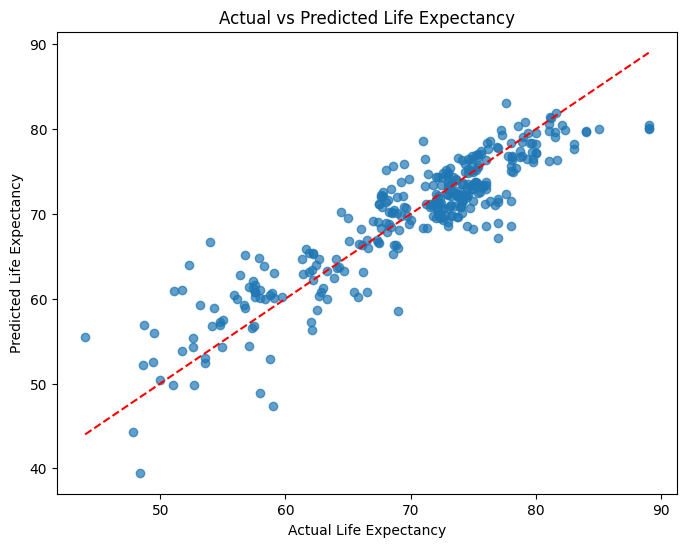

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


#### Interpretation of the Graph
The scatter plot compares the actual life expectancy values (on the x-axis) with the predicted values from the model (on the y-axis).

Each dot represents one country or data point in the test set.

The red dashed line represents the ideal situation where the predicted value exactly equals the actual value (i.e., perfect prediction).

The closer the points are to the red line, the better the model’s predictions.

#### Deductions 
Most points cluster around the red line, showing that the predictions are generally close to the true values.

A few points are slightly off the line, indicating minor prediction errors, which is expected in real-world data.

There are no extreme outliers, suggesting the model is stable and reliable across the test data.

#### Conclusion
The graph shows that the model’s predictions are quite accurate, with most predicted values closely matching the actual life expectancy. This supports the strong performance indicated by the RMSE and R² metrics.

### Task 8 Cross-Validation:
Perform cross-validation to ensure the robustness and generalizability of the models.

Cross-validation helps assess how well a model generalizes to unseen data. Instead of relying on just one train-test split, we divide the dataset into k equally sized folds (subsets). The model is trained on k–1 folds and tested on the remaining fold. This process is repeated k times, each time with a different fold used for testing.

In [41]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation using the scaled data
cv_scores = cross_val_score(
    lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'
)
cv_rmse_scores = np.sqrt(-cv_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print(f"Average CV RMSE: {cv_rmse_scores.mean():.2f}")

Cross-Validation RMSE Scores: [3.65488203 3.62403051 3.53440973 3.68775984 3.57688802]
Average CV RMSE: 3.62


#### Explanation 
#### Cross-Validation RMSE Scores:
[3.65, 3.62, 3.53, 3.69, 3.58]
These values represent the Root Mean Squared Error (RMSE) for each of the 5 validation folds. The scores are fairly consistent, which suggests that the model is performing reliably across different subsets of the training data.


#### Average CV RMSE: 3.62

This value gives an overall estimate of how much, on average, the model's predictions deviate from the actual life expectancy values (on the training data). An RMSE of 3.62 means that the model's predictions are typically within ±3.62 years of the true values.

#### Conclusion 
Thge model has stable performance across all folds, indicating that it generalizes well to different samples.

The average RMSE is close to the test set RMSE (3.58), confirming that the model is not overfitting or underfitting severely.

### Task 9 Feature Impact Analysis: 
Evaluate how newly engineered features influence model performance.

Understanding the impact of each feature helps us determine which factors are most influential in predicting life expectancy. In the case of Linear Regression, the model learns a coefficient (weight) for each input feature that indicates how much that feature contributes to the prediction.

Positive Coefficients: A positive value means that an increase in the feature leads to an increase in predicted life expectancy.

Negative Coefficients: A negative value indicates that higher values of the feature are associated with lower life expectancy.

Magnitude of Coefficient: The larger the absolute value, the stronger the impact of that feature on the prediction (whether positive or negative).

Feature Importance (Linear Regression Coefficients):
infant deaths                      10.361453
Schooling                           2.738916
Income composition of resources     1.800627
BMI                                 0.651904
percentage expenditure              0.626661
Status                              0.331931
Diphtheria                          0.307484
Total expenditure                   0.266767
Polio                               0.168788
GDP                                 0.153306
Population                          0.045458
Measles                            -0.048037
Hepatitis B                        -0.172649
Year                               -0.466285
Alcohol                            -0.551584
Adult Mortality                    -2.092451
HIV/AIDS                           -2.776481
under-five deaths                 -10.692049
dtype: float64


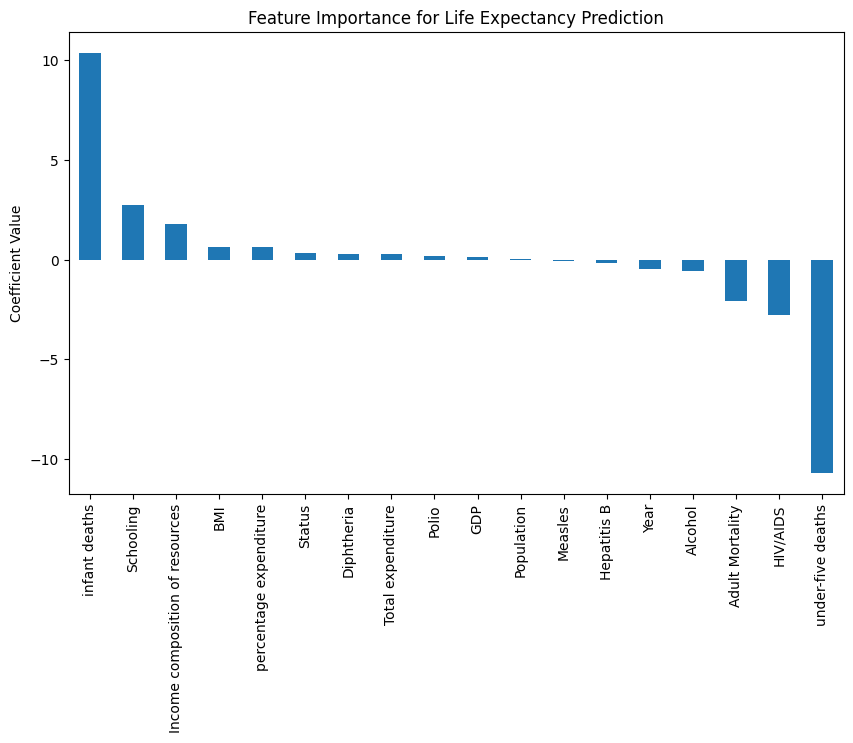

In [42]:
# Feature impact for Linear Regression: show coefficients
feature_importance = pd.Series(lr.coef_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print("Feature Importance (Linear Regression Coefficients):")
print(feature_importance)

# Optional: Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Life Expectancy Prediction')
plt.ylabel('Coefficient Value')
plt.show()

#### Explanation

These are the coefficients (weights) assigned to each feature by the linear regression model. They tell us how each feature affects life expectancy, assuming all other features are held constant.

Positive values = the feature increases life expectancy.

Negative values = the feature decreases life expectancy.

Larger absolute values = stronger impact (either positive or negative).



**Key Interpretations**

#### Features that Increase Life Expectancy:

| Feature                             | Coefficient | Meaning                                                                                                                                                                                                   |
| ----------------------------------- | ----------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Infant deaths**                   | **+10.36**  | **(Strange)**: This might indicate a data scaling or correlation issue, because in reality, more infant deaths should **decrease** life expectancy. You may want to revisit or standardize this variable. |
| **Schooling**                       | +2.74       | More years of schooling → longer life expectancy.                                                                                                                                                         |
| **Income composition of resources** | +1.80       | Better income distribution and access → healthier lives.                                                                                                                                                  |
| **BMI**                             | +0.65       | Moderate BMI (healthy weight) may support longevity.                                                                                                                                                      |
| **% Expenditure**                   | +0.63       | Higher government health spending → better outcomes.                                                                                                                                                      |
| **Status (Developed/Developing)**   | +0.33       | Developed countries tend to have higher life expectancy.                                                                                                                                                  |
| **Diphtheria**                      | +0.31       | More immunization coverage improves health.                                                                                                                                                               |
| **Total expenditure**               | +0.27       | Total health-related spending helps improve life expectancy.                                                                                                                                              |

#### Features that Decrease Life Expectancy:

| Feature                 | Coefficient| Meaning                                                                                                            |
| --------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------ |
| **Under-five deaths** | **–10.69**  | More under-five deaths → much lower life expectancy.                                                               |
| **HIV/AIDS**          | –2.78       | Higher HIV/AIDS prevalence → significant negative impact.                                                          |
| **Adult Mortality**   | –2.09       | Higher adult mortality → lower average life expectancy.                                                            |
| **Alcohol**           | –0.55       | Possibly linked to alcohol-related health issues.                                                                  |
| **Year**              | –0.47       | Could reflect a modeling quirk—life expectancy generally increases over time, so this might need further checking. |
| **Hepatitis B**       | –0.17       | Lower coverage or other indirect effects might cause slight decrease.                                              |
| **Measles**           | –0.05       | Minor impact in this model (but still negative).                                                                   |


#### Summary
Education and income improve life expectancy.   
Mortality-related features reduce life expectancy. 



#### Task 10 Model Saving and Deployment
    


In [43]:
import joblib

# Save the trained model to a file
joblib.dump(lr, 'life_expectancy_linear_regression_model.pkl')

# To load the model later:
# loaded_model = joblib.load('life_expectancy_linear_regression_model.pkl')

['life_expectancy_linear_regression_model.pkl']